# Pre-Processing

In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [347]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

def cek_duplikat(df):
    dup = df.duplicated()
    print("Jumlah duplikasi data : " + str(dup.sum()))

# Data Preprocessing


In [ ]:
df_final = pd.read_csv('../dataset final/final_dataset.csv')

In [386]:
agent_encode_df = pd.read_csv('../dataset/agent_encode.csv')

In [387]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [388]:
check_null(df_final)

Tidak ditemukan missing value pada dataset


In [389]:
outliers = dict(check_outlier(df_final.select_dtypes(include=['int64'])).sum())

Outlier pada tiap atribut:
GameID                   0
MatchID               1060
Team1ID_x                0
Team2ID_x                0
Winner               25310
Team1_TotalRounds    31780
Team2_TotalRounds        0
EventID                  0
Team1ID_y                0
Team2ID_y                0
Team1_MapScore           0
Team2_MapScore        2260
dtype: int64


In [390]:
from scipy.stats import zscore

# Assuming df is your dataframe
numeric_cols = ['Team1_TotalRounds', 'Team2_TotalRounds', 'Team1_MapScore', 'Team2_MapScore']  # example numeric columns

# Apply Z-score to identify outliers
z_scores = np.abs(zscore(df_final[numeric_cols]))

# Cap outliers beyond 3 standard deviations
df_capped = df_final[(z_scores < 3).all(axis=1)]

In [391]:
numerical_columns = df_final.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_final.select_dtypes(include=['object']).columns

In [392]:
df_final.head()

,GameID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,ADR,...,Patch,EventID,EventName,EventStage,Team1ID_y,Team2ID_y,Team1_y,Team2_y,Team1_MapScore,Team2_MapScore
0,60894,Reduxx,Boos,jett,313.0,24.0,10.0,3.0,14.0,195.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,60894,ChurmZ,Boos,chamber,227.0,16.0,10.0,7.0,6.0,161.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
2,60894,diaamond,Boos,sova,226.0,17.0,9.0,8.0,8.0,148.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
3,60894,Boltzy,Boos,viper,218.0,17.0,12.0,2.0,5.0,141.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
4,60894,Virtyy,Boos,skye,80.0,5.0,13.0,3.0,-8.0,55.0,...,3.0,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1


In [393]:
df_final = pd.merge(df_final, agent_encode_df, on='Agent', how='left')
df_final.drop(columns=['Agent', 'Unnamed: 0', 'ACS'], inplace=True)
df_final.rename(columns={'Encode': 'AgentEncoded'}, inplace=True)

In [394]:
df_final['AgentEncoded'].value_counts().sort_values(ascending=False)

1     16539
0     15936
13    10845
11     9118
6      9089
4      8382
8      6684
2      5974
7      5564
12     5053
5      4812
9      4469
15     2938
14     1761
3       786
10      151
16      149
Name: AgentEncoded, dtype: int64

In [395]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108250 entries, 0 to 108249
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GameID             108250 non-null  int64  
 1   PlayerName         108250 non-null  object 
 2   TeamAbbreviation   108250 non-null  object 
 3   Kills              108250 non-null  float64
 4   Deaths             108250 non-null  float64
 5   Assists            108250 non-null  float64
 6   PlusMinus          108250 non-null  float64
 7   ADR                108250 non-null  float64
 8   HS_Percent         108250 non-null  float64
 9   FirstKills         108250 non-null  float64
 10  FirstDeaths        108250 non-null  float64
 11  FKFD_PlusMinus     108250 non-null  float64
 12  Num_2Ks            108250 non-null  float64
 13  Num_3Ks            108250 non-null  float64
 14  Num_4Ks            108250 non-null  float64
 15  Num_5Ks            108250 non-null  float64
 16  On

In [396]:
import pandas as pd

unique_counts = {}

for column in df_final.columns:
    if df_final[column].dtype == 'object':
        unique_values = df_final[column].nunique()
        unique_counts[column] = unique_values

for column, count in unique_counts.items():
    print(f"Column '{column}' has {count} unique values.")


Column 'PlayerName' has 6650 unique values.
Column 'TeamAbbreviation' has 1586 unique values.
Column 'Map' has 7 unique values.
Column 'Team1_x' has 979 unique values.
Column 'Team2_x' has 1620 unique values.
Column 'Date' has 3520 unique values.
Column 'EventName' has 518 unique values.
Column 'EventStage' has 818 unique values.
Column 'Team1_y' has 987 unique values.
Column 'Team2_y' has 1635 unique values.


In [397]:
df_final = pd.get_dummies(df_final, columns=['Map'], drop_first=True)
df_final.drop(columns=['PlayerName', 'TeamAbbreviation', 'Team1_x', 'Team2_x', 'Date', 'EventName', 'EventStage', 'Team1_y', 'Team2_y'], inplace=True)

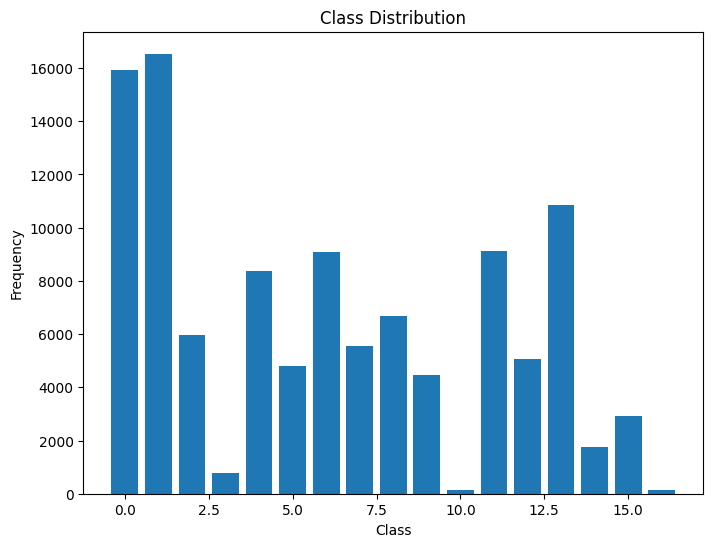

Class Frequencies:
 1     16539
0     15936
13    10845
11     9118
6      9089
4      8382
8      6684
2      5974
7      5564
12     5053
5      4812
9      4469
15     2938
14     1761
3       786
10      151
16      149
Name: AgentEncoded, dtype: int64

Class Proportions:
 1     0.152785
0     0.147215
13    0.100185
11    0.084231
6     0.083963
4     0.077432
8     0.061746
2     0.055187
7     0.051400
12    0.046679
5     0.044453
9     0.041284
15    0.027141
14    0.016268
3     0.007261
10    0.001395
16    0.001376
Name: AgentEncoded, dtype: float64

Imbalance Ratio: 111.0


In [398]:
target_column = 'AgentEncoded'

# Calculate class frequencies
class_frequencies = df_final[target_column].value_counts()

# Calculate class proportions
class_proportions = df_final[target_column].value_counts(normalize=True)

# Calculate the imbalance ratio
imbalance_ratio = class_frequencies.max() / class_frequencies.min()

# Visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_frequencies.index, class_frequencies.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

# Output class frequencies, proportions, and imbalance ratio
print("Class Frequencies:\n", class_frequencies)
print("\nClass Proportions:\n", class_proportions)
print("\nImbalance Ratio:", imbalance_ratio)

# Modelling

In [399]:
X = df_final.drop('AgentEncoded', axis=1)
y = df_final['AgentEncoded']

In [400]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [402]:
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

oversampler = RandomOverSampler(sampling_strategy='minority')

results = {}

scoring = ['f1_micro']

for name, classifier in zip(names, classifiers):
    pipeline = Pipeline([
        ('over', oversampler),
        ('model', classifier)
    ])

    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    print(f"{name} Scores:")
    scoring = ['f1_micro']
    for i in range(len(scoring)):
      score = cross_val_score(pipeline, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
      print(f"{scoring[i]} score: {np.mean(score)}")

Nearest Neighbors Scores:
f1_micro score: 0.21013394919168593
Decision Tree Scores:
f1_micro score: 0.2529145496535797
Random Forest Scores:
f1_micro score: 0.20528406466512703
Neural Net Scores:
f1_micro score: 0.3835288683602771
AdaBoost Scores:
f1_micro score: 0.2654041570438799
Naive Bayes Scores:
f1_micro score: 0.0525635103926097
QDA Scores:
f1_micro score: 0.044277136258660504


In [403]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [404]:
classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(100),
    activation='relu',
    random_state=42,
)

steps = [('under', RandomOverSampler(sampling_strategy='minority')), ('model', classifier)]
pipeline = Pipeline(steps=steps)

In [405]:
pipeline.fit(X,y)

Pipeline(steps=[('under', RandomOverSampler(sampling_strategy='minority')),
                ('model',
                 MLPClassifier(alpha=1e-05, hidden_layer_sizes=100,
                               random_state=42))])

In [406]:
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.39058660508083143
f1_macro score: 0.26974411805116066
precision_micro score: 0.3906235565819861
precision_macro score: 0.2970485677148857
recall_micro score: 0.3917136258660508
recall_macro score: 0.2628685331680423


# Data Prediction

In [407]:
df_scores_test = pd.read_csv('./scores_test.csv')
df_games_test = pd.read_csv('./games_test.csv')
df_matches_test = pd.read_csv('./matches_test.csv')

df_scores_test_processed = df_scores_test.drop(['KAST_Percent', 'PlayerID', 'No'], axis=1)
df_scores_test_processed.fillna(df_scores_test_processed.median(), inplace=True)

df_games_test_processed = df_games_test.drop(['No'], axis=1)
df_games_test_processed.fillna(df_games_test_processed.median(), inplace=True)

df_matches_test_processed = df_matches_test.drop(['No'], axis=1)
df_matches_test_processed = df_matches_test_processed.apply(handle_patch_null, axis=1)
df_matches_test_processed['Patch'] = df_matches_test_processed['Patch'].str.extract(r'(\d)\.\d+').astype(float)
df_matches_test_processed.fillna(df_matches_test_processed.median(), inplace=True)

df_test_merged_1 = pd.merge(df_scores_test_processed, df_games_test_processed, on='GameID', how='left')
df_test_merged_final = pd.merge(df_test_merged_1, df_matches_test_processed, on='MatchID', how='left')

<ipython-input-407-de2baf86d746>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores_test_processed.fillna(df_scores_test_processed.median(), inplace=True)
<ipython-input-407-de2baf86d746>:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_games_test_processed.fillna(df_games_test_processed.median(), inplace=True)
<ipython-input-407-de2baf86d746>:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=No

In [408]:
df_test_merged_final = pd.get_dummies(df_test_merged_final, columns=['Map'], drop_first=True)

X_test = df_test_merged_final[df_final.drop(['AgentEncoded'], axis=1).columns]

X_test_scaled = scaler.transform(X_test)

y_test_pred = pipeline.predict(X_test_scaled)

submission = pd.DataFrame({
    'No': df_scores_test['No'],
    'Agent': y_test_pred
})

submission.head()

,No,Agent
0,100,2
1,101,2
2,102,2
3,103,5
4,104,10


In [409]:
submission.to_csv('classify.csv', index=False)